In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from csv import writer
import re
import seaborn as sns
import matplotlib.pyplot as plt

1-) Informational responses (100–199)

2-) Successful responses (200–299)

3-) Redirection messages (300–399)

4-) Client error responses (400–499)

5-) Server error responses (500–599)

In [2]:
def house_scraping(url,csv):
    #url = "https://www.hepsiemlak.com/umraniye-kiralik"
    page = requests.get(url)
    
    # Every html file is in the soup right now
    soup = BeautifulSoup(page.content,'html.parser')
    lists = soup.find_all('li',class_="listing-item")
    
    # That function is for csv file
    with open(csv,'a',encoding='utf8',newline='') as f:
        csv_writer = writer(f)
        header = ['Description','Weekend','Area','Age','Floor','Price']
        csv_writer.writerow(header)
        for list in lists:
            description = list.find('header',class_ = 'list-view-header').text.replace('\n','')
            weekend = list.find('span',class_ = 'celly houseRoomCount').text.replace('\n','')
            area = list.find('span',class_ = 'celly squareMeter list-view-size').text.replace('\n','')
            age = list.find('span',class_ = 'celly buildingAge').text.replace('\n','')
            floor = list.find('span',class_ = 'celly floortype').text.replace('\n','')
            price = list.find('span',class_ = 'list-view-price').text.replace('\n','')
            info = [description,weekend,area,age,floor,price]
            csv_writer.writerow(info)

In [3]:
def county(name,page):
    """Web scrapping is beginning from here, I have URL of website and it has an exception for first page which is different
    between anothers so I am using if-else condition for that."""
    for i in range(page):
        if i == 0:
            house_scraping(url=f"https://www.hepsiemlak.com/{name}-kiralik",csv=f"hepsiemlak_{name}.csv")
        else:
            house_scraping(url=f"https://www.hepsiemlak.com/{name}-kiralik?page={i+1}",csv=f"hepsiemlak_{name}.csv")

## Uskudar

In [4]:
"""Uskudar is the county in Istanbul and I am using this variable for the project and then page number is, 
when you visit website you can see that Uskudar page has only 9 pages values.
Also you can write 'atasehir' 'umraniye' or any county names into Istanbul."""
county("uskudar",9)
dataset = pd.read_csv("hepsiemlak_uskudar.csv")
dataset

,Description,Weekend,Area,Age,Floor,Price
0,libadiye cad. yakın ku...,2 + 1,90 m2,5 Yaşında,3. Kat,12.000 TL
1,sevinç dan.. üsk.fuul ...,3 + 1,150 m2,Sıfır Bina,4. Kat,10.000 TL
2,yeni evlenecek çiftler...,2 + 1,80 m2,5 Yaşında,5. Kat,8.000 TL
3,üsküdar burhaniye 'de ...,2 + 1,75 m2,25 Yaşında,Zemin,3.500 TL
4,üsküdar’da sıfır binad...,3 + 1,88 m2,Sıfır Bina,1. Kat,11.000 TL
...,...,...,...,...,...,...
204,üsküdar merkez marmara...,2 + 1,90 m2,30 Yaşında,3. Kat,8.000 TL
205,muhteşem havuzlu rıhtı...,5 + 1,500 m2,38 Yaşında,3. Kat,320.000 TL
206,üsküdar selimiye'de de...,3 + 1,160 m2,30 Yaşında,Teras Katı,20.000 TL
207,üsküdar harem'de payla...,Stüdyo,36 m2,15 Yaşında,Ara Kat,2.600 TL


In [5]:
# Well, right now we have a dataset from website and it has some features, let's dive into dataset and make data cleaning.
dataset.Weekend.value_counts()
# In here we have a bunch different type of Weekend values and some of them are inconsistent so we can drop them. 

3 + 1      59
2 + 1      54
1 + 1      29
4 + 1      21
5 + 1       9
Weekend     8
4 + 2       6
Stüdyo      4
2 + 2       3
5 + 2       3
6 + 1       3
6 + 2       2
10 + 4      1
5 + 3       1
10 + 2      1
2 + 0       1
3 + 2       1
8 + 3       1
6 + 3       1
8 + 2       1
Name: Weekend, dtype: int64

In [6]:
my_list = []
for i in range(len(dataset)):
    if dataset.Weekend.iloc[i] == "Weekend":
        my_list.append(i)
        
dataset = dataset.drop(my_list)
dataset.Weekend.value_counts()

3 + 1     59
2 + 1     54
1 + 1     29
4 + 1     21
5 + 1      9
4 + 2      6
Stüdyo     4
2 + 2      3
5 + 2      3
6 + 1      3
6 + 2      2
10 + 4     1
5 + 3      1
10 + 2     1
2 + 0      1
3 + 2      1
8 + 3      1
6 + 3      1
8 + 2      1
Name: Weekend, dtype: int64

In [7]:
""" Let's work on Area values, it is object type values for this reason we can use regular expression to split values and 
make it integer style values."""
dataset.Area.value_counts()

                          100 m2    14
                          90 m2     12
                          150 m2    12
                          140 m2    10
                          75 m2      8
                                    ..
                          163 m2     1
                          187 m2     1
                          87 m2      1
                          230 m2     1
                          36 m2      1
Name: Area, Length: 65, dtype: int64

In [8]:
for i in range(len(dataset)):
    try:
        dataset.Area.iloc[i] = int(re.split(r"\s+",dataset.Area.iloc[i])[1])
    except:
        # Only one value has 1.300 m^2 value so we can drop it from dataset.
        pass
    
for i in range(len(dataset)):
    try:
        if type(dataset.Area.iloc[i]) == str:
            dataset = dataset.drop(i)
    except:
        pass

In [9]:
# In here, I will remove letters to make datas integer again so I need to use regular expression.
dataset.Age.value_counts()

Sıfır Bina    38
30 Yaşında    25
25 Yaşında    18
35 Yaşında    12
2 Yaşında      9
3 Yaşında      9
20 Yaşında     9
40 Yaşında     8
15 Yaşında     8
10 Yaşında     8
26 Yaşında     6
1 Yaşında      6
4 Yaşında      6
5 Yaşında      5
31 Yaşında     4
8 Yaşında      3
45 Yaşında     2
16 Yaşında     2
22 Yaşında     2
14 Yaşında     2
27 Yaşında     2
11 Yaşında     2
6 Yaşında      1
21 Yaşında     1
12 Yaşında     1
33 Yaşında     1
32 Yaşında     1
19 Yaşında     1
18 Yaşında     1
50 Yaşında     1
34 Yaşında     1
36 Yaşında     1
7 Yaşında      1
17 Yaşında     1
13 Yaşında     1
38 Yaşında     1
Name: Age, dtype: int64

In [10]:
for i in range(len(dataset)):
    if dataset.Age.iloc[i] == "Sıfır Bina":
        dataset.Age.iloc[i] = 0
    else:
        dataset.Age.iloc[i] = int(re.split(r"\s+",dataset.Age.iloc[i])[0])
dataset.Age.value_counts().sort_index(ascending=True)

0     38
1      6
2      9
3      9
4      6
5      5
6      1
7      1
8      3
10     8
11     2
12     1
13     1
14     2
15     8
16     2
17     1
18     1
19     1
20     9
21     1
22     2
25    18
26     6
27     2
30    25
31     4
32     1
33     1
34     1
35    12
36     1
38     1
40     8
45     2
50     1
Name: Age, dtype: int64

In [11]:
"""That one is Floor column which is a bit trickier than others. For that one, I will make Bahçe, Giriş, Yuksek to declare 1
and then I will delete some of them."""
dataset.Floor.value_counts()

                      4. Kat          30
                      1. Kat          21
                      3. Kat          20
                      Bahçe Katı      15
                      Ara Kat         13
                      Giriş Katı      13
                      2. Kat          12
                      En Üst Kat      12
                      5. Kat          10
                      Yüksek Giriş     9
                      21 ve üzeri      6
                      Kot 1            3
                      Teras Katı       3
                      15. Kat          2
                      Zemin            2
                      6. Kat           2
                      Çatı Katı        2
                      Yarı Bodrum      1
                      13. Kat          1
                      20. Kat          1
                      Villa Katı       1
                      19. Kat          1
                      9. Kat           1
                      Kot 2            1
                

In [12]:
floor_list = []
for i in range(len(dataset)):
    try:
        dataset.Floor.iloc[i] = int(re.split(r"[-;,.\s]\s*",dataset.Floor.iloc[i])[1])
    except:
        pass

for i in range(len(dataset)):
    try:
        value = re.split(r"[-;,.\s]\s*",dataset.Floor.iloc[i])[1]
        if value == "Bahçe":
            dataset.Floor.iloc[i] = 1
        elif value == "Giriş":
            dataset.Floor.iloc[i] = 1
        elif value == "Yüksek":
            dataset.Floor.iloc[i] = 1
    except:
        pass
    
k = 0
t = 0
for i in range(len(dataset)):
    if type(dataset.Floor.iloc[i]) == int:
        k = k + dataset.Floor.iloc[i]
        t = t + 1
mid_layer = int(k/t)
for i in range(len(dataset)):
    try:
        value = re.split(r"[-;,.\s]\s*",dataset.Floor.iloc[i])[1]
        if value == "Ara":
            dataset.Floor.iloc[i] = mid_layer
        elif value == "En":
            dataset.Floor.iloc[i] = 21
    except:
        pass
    
    
drop_list = []
for i in range(len(dataset)):
    if type(dataset.Floor.iloc[i]) == str:
        drop_list.append(i)
dataset = dataset.drop(dataset.index[[drop_list]])

C:\Users\cagri\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [13]:
"""The last step of preprocessing is Price columns, every single row has TL letters and some blank so I can use regex for,
cleaning that datas then make it integer as well."""
dataset.Price.value_counts()

              10.000              TL    9
              15.000              TL    8
              9.000              TL     7
              8.000              TL     6
              5.500              TL     6
                                       ..
              3.000              TL     1
              60.390              TL    1
              22.000              TL    1
              16.500              TL    1
              2.000              TL     1
Name: Price, Length: 82, dtype: int64

In [14]:
for i in range(len(dataset)):
    value = re.split(r"[-;,.\s]\s*",dataset.Price.iloc[i])[1:3]
    dataset.Price.iloc[i] = int(value[0]) * 1000

In [15]:
"""With this function I am checking if the data has any null values, If the data has null variables, I can fill it with mean, 
median values or I can drop them as I wish."""
dataset.isnull().sum()

Description     0
Weekend         0
Area            0
Age             0
Floor          16
Price           0
dtype: int64

In [16]:
dataset = dataset.dropna()
dataset

,Description,Weekend,Area,Age,Floor,Price
0,libadiye cad. yakın ku...,2 + 1,90,5,3,12000
1,sevinç dan.. üsk.fuul ...,3 + 1,150,0,4,10000
2,yeni evlenecek çiftler...,2 + 1,80,5,5,8000
4,üsküdar’da sıfır binad...,3 + 1,88,0,1,11000
5,üsküdar ahmediye mah a...,2 + 1,75,40,3,5000
...,...,...,...,...,...,...
203,üsküdar zeynep kamil 1...,1 + 1,75,30,1,6000
204,üsküdar merkez marmara...,2 + 1,90,30,3,8000
205,muhteşem havuzlu rıhtı...,5 + 1,500,38,3,320000
207,üsküdar harem'de payla...,Stüdyo,36,15,3,2000


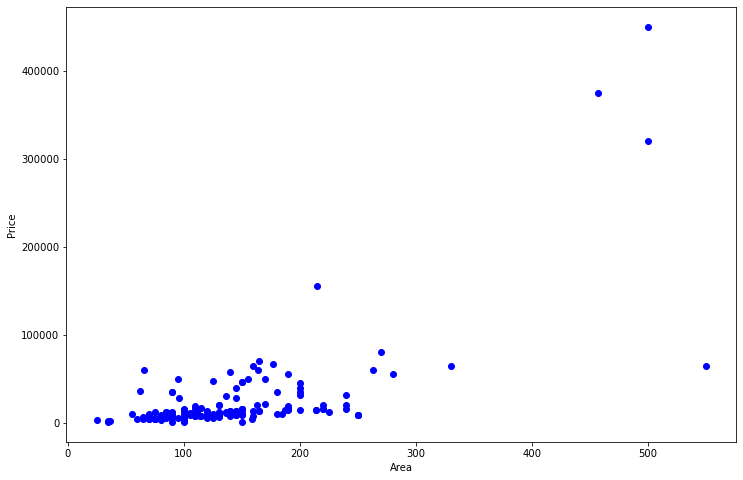

In [17]:
""" Let's visualize the dataset's Area and dataset's Price together. That correlation seems that the values looks homogenized.
If we delete 5 values which are bigger than 300 m^2 area, the distrubition will look more detailed."""
plt.figure(figsize=(12,8))
plt.scatter(dataset.Area.values, dataset.Price.values, c ="blue")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

C:\Users\cagri\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


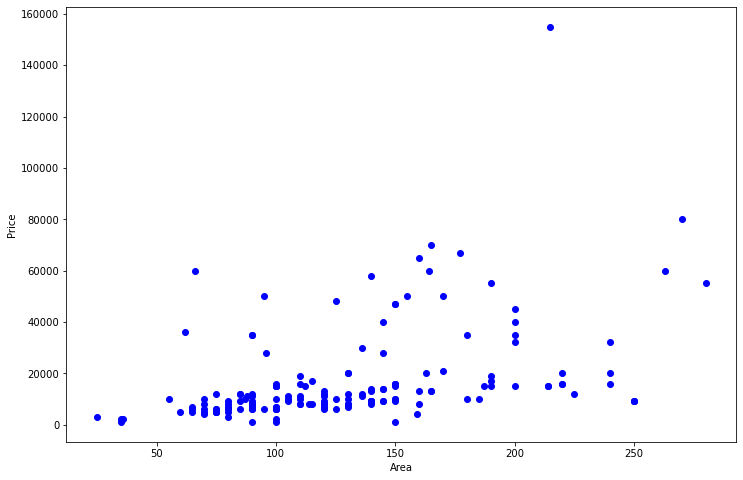

In [18]:
drop_list = []
for i in range(len(dataset)):
    if dataset.Area.iloc[i] > 300:
        drop_list.append(i)
dataset = dataset.drop(dataset.index[[drop_list]])

plt.figure(figsize=(12,8))
plt.scatter(dataset.Area.values, dataset.Price.values, c ="blue")
plt.xlabel("Area")
plt.grid(False)
plt.ylabel("Price")
plt.show()

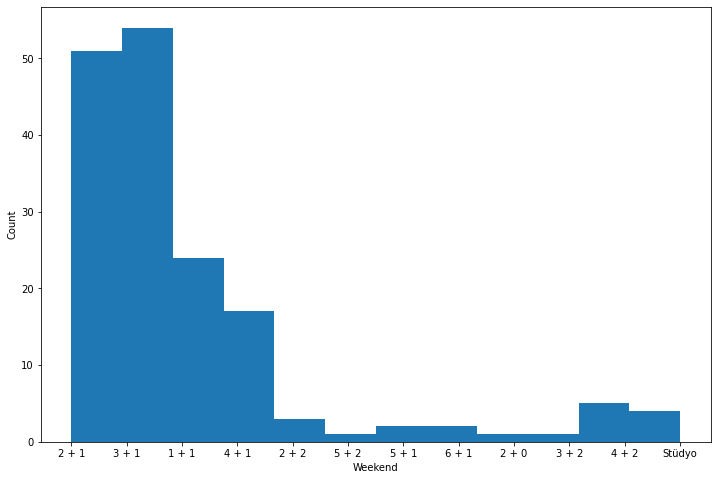

In [19]:
# All house's weekends visualized by histogram in here.
plt.figure(figsize=(12,8))
plt.hist(dataset.Weekend,bins=dataset.Weekend.value_counts().count())
plt.grid(False)
plt.xlabel("Weekend")
plt.ylabel("Count")
plt.show()

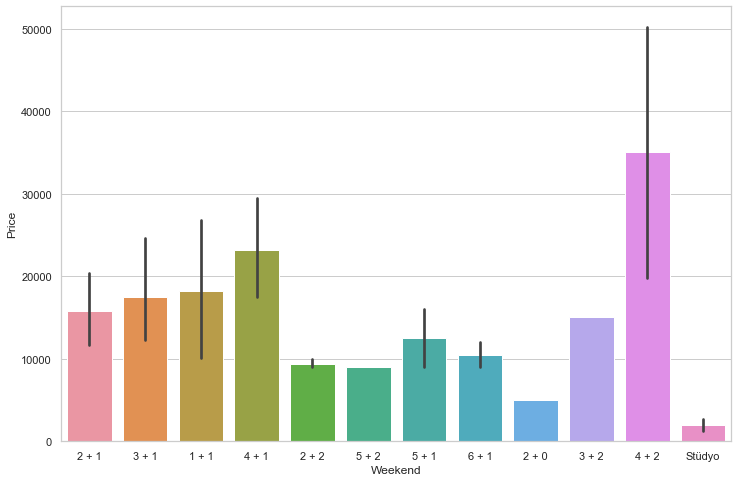

In [20]:
# With barplot, the dataset's Price and Weekends datas has been visualized.
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Weekend", y="Price", data=dataset)
plt.xlabel("Weekend")
plt.ylabel("Price")
plt.show()

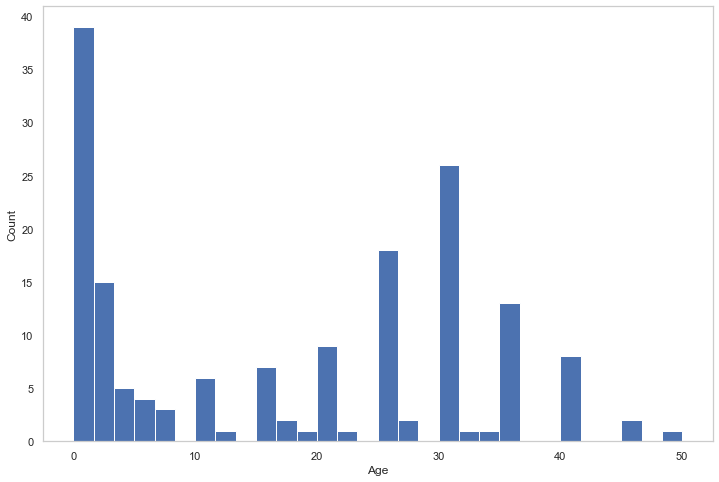

In [21]:
plt.figure(figsize=(12,8))
plt.hist(dataset.Age,bins=dataset.Age.value_counts().count())
plt.grid(False)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()